In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [28]:
start = '2012-01-01'
end = '2022-12-21'
stock = 'GOOG'

data = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [29]:
data.reset_index(inplace=True)

In [30]:
data

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG
0,2012-01-03 00:00:00+00:00,16.532528,16.573130,16.641375,16.248346,16.262545,147611217
1,2012-01-04 00:00:00+00:00,16.603836,16.644611,16.693678,16.453827,16.563665,114989399
2,2012-01-05 00:00:00+00:00,16.373516,16.413727,16.537264,16.344486,16.491436,131808205
3,2012-01-06 00:00:00+00:00,16.150156,16.189817,16.438385,16.184088,16.417213,108119746
4,2012-01-09 00:00:00+00:00,15.465409,15.503389,16.114599,15.472754,16.102144,233776981
...,...,...,...,...,...,...,...
2756,2022-12-14 00:00:00+00:00,95.076508,95.309998,97.220001,93.940002,95.540001,26452900
2757,2022-12-15 00:00:00+00:00,90.976578,91.199997,94.029999,90.430000,93.540001,28298800
2758,2022-12-16 00:00:00+00:00,90.637405,90.860001,91.750000,90.010002,91.199997,48485500


In [31]:
ma_100_days = data.Close.rolling(100).mean()

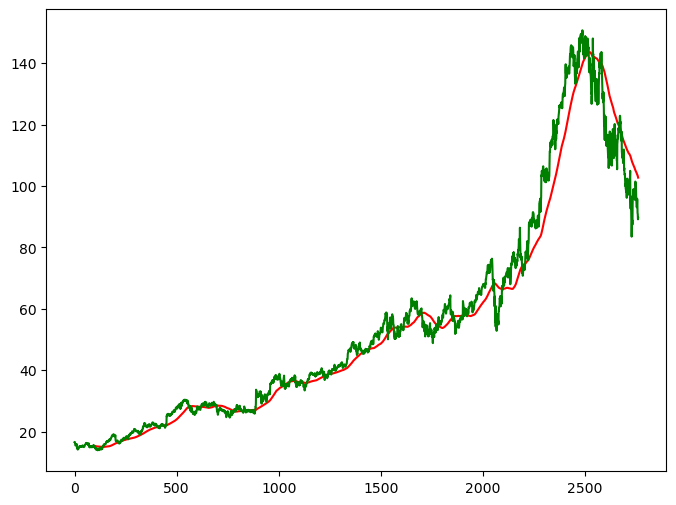

In [32]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [33]:
ma_200_days = data.Close.rolling(200).mean()

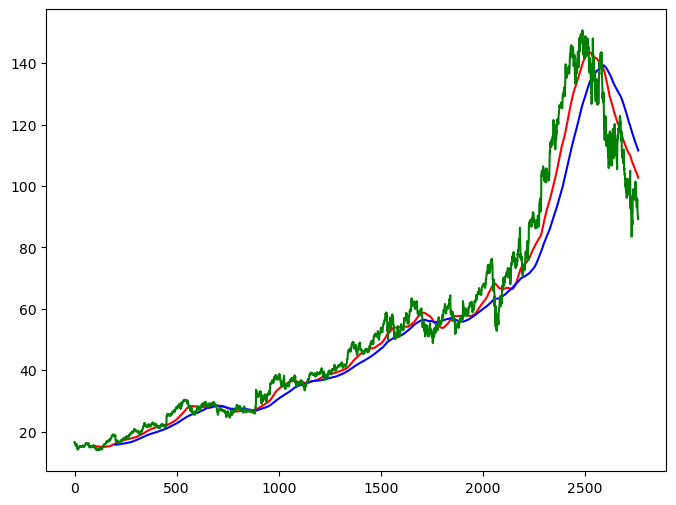

In [34]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [35]:
data.dropna(inplace=True)

In [36]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [37]:
data_train.shape[0]

2208

In [38]:
data_test.shape[0]

553

In [39]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [40]:
data_train_scale = scaler.fit_transform(data_train)

In [41]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])
    

In [42]:
x, y = np.array(x), np.array(y)

In [43]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [44]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

/home/aditya/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [45]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [46]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 15s 101ms/step - loss: 0.0886
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 106ms/step - loss: 0.0098
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 104ms/step - loss: 0.0060
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 108ms/step - loss: 0.0057
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 106ms/step - loss: 0.0050
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 109ms/step - loss: 0.0051
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 104ms/step - loss: 0.0051
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 106ms/step - loss: 0.0051
Epoch 9/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 106ms/step - loss: 0.0045
Epoch 10/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 108ms/step - loss: 0.0049
Epoch 11/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 107ms/step - loss: 0.0050
Epoch 12/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 105ms/step - loss: 0.0041
Epoch 13/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 107ms/step - loss: 0.0042
Epoch 14/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 105ms/step - loss: 0.0037
Epoch 15/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 107ms/step - l

In [47]:
model.summary()]

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [48]:
pas_100_days = data_train.tail(100)

In [49]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [50]:
data_test_scale  =  scaler.fit_transform(data_test)

In [51]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [52]:
y_predict = model.predict(x)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step


In [53]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming y contains the true values and y_predict contains the predictions
def print_regression_metrics(y, y_predict):
    mae = mean_absolute_error(y, y_predict)
    mse = mean_squared_error(y, y_predict)
    r2 = r2_score(y, y_predict)

    print("Mean Absolute Error (MAE):", mae)
    print("Mean Squared Error (MSE):", mse)
    print("R-squared (R²) Score:", r2)

print_regression_metrics(y, y_predict)

Mean Absolute Error (MAE): 0.045517221829663
Mean Squared Error (MSE): 0.003223583686562872
R-squared (R²) Score: 0.9444183069249324


In [54]:
scale =1/scaler.scale_

In [55]:
y_predict = y_predict*scale

In [56]:
y = y*scale

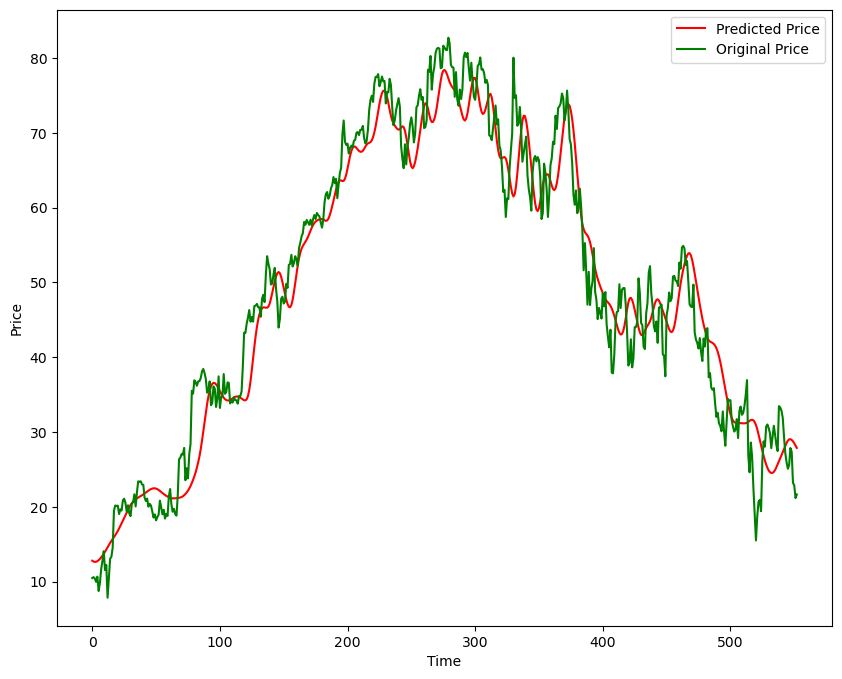

In [57]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [58]:
model.save('Stock Predictions Model.keras')

[*********************100%***********************]  1 of 1 completed


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step


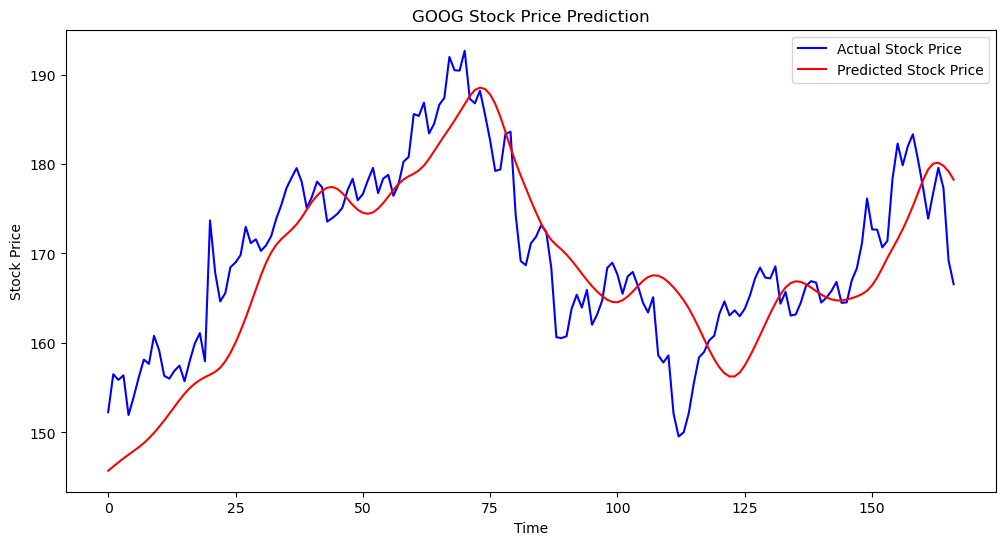

In [61]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from sklearn.preprocessing import MinMaxScaler

# Define the date range and stock ticker
start = '2024-01-01'
end = '2024-12-21'
stock = 'GOOG'

# Download the data
data = yf.download(stock, start=start, end=end)

# Select the 'Close' column for prediction
data = data[['Close']]

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Prepare the data as per the time steps used in model training
def create_dataset(data, time_step=60):
    X_data = []
    y_data = []
    for i in range(time_step, len(data)):
        X_data.append(data[i-time_step:i, 0])  # Use only the 'Close' column for X
        y_data.append(data[i, 0])  # Next 'Close' price as target for y
    return np.array(X_data), np.array(y_data)

# Set the time_step to the same value as used during training
time_step = 60  # Adjust based on your model's training step

# Create input and actual values
X_input, y_actual = create_dataset(scaled_data, time_step)
X_input = np.reshape(X_input, (X_input.shape[0], X_input.shape[1], 1))  # Reshape to 3D for LSTM input

# Load the saved model
model = load_model('Stock Predictions Model.keras')

# Make predictions
predictions = model.predict(X_input)

# Inverse scale both predictions and actual values
predicted_prices = scaler.inverse_transform(predictions)
actual_prices = scaler.inverse_transform(y_actual.reshape(-1, 1))

# Plot the actual vs predicted prices
plt.figure(figsize=(12, 6))
plt.plot(actual_prices, color='blue', label='Actual Stock Price')
plt.plot(predicted_prices, color='red', label='Predicted Stock Price')
plt.title(f'{stock} Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [64]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np


# Split data into training and testing datasets
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

# Scale training data
scaler = MinMaxScaler(feature_range=(0, 1))
data_train_scale = scaler.fit_transform(data_train)

x = []
y = []

# Create input-output pairs
for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i, 0])

x, y = np.array(x), np.array(y)


In [96]:
from keras.layers import Conv1D, Flatten

model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(100, 1)))  # Add Conv1D
model.add(Dropout(0.2))
model.add(Flatten())  # Flatten the output of Conv1D
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x, y, epochs=50, batch_size=32)


Epoch 1/50


/home/aditya/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.6053
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1089 
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1918 
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1921
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0919 
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0574 
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0715 
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0515 
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0288 
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0271 
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0204 
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0081 
Epoch 13/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0096 
Epoch 14/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0102 
Epoch 15/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0105 
Epoch 16/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/st

In [98]:
from keras.layers import Conv1D, LSTM

model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(100, 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x, y, epochs=50, batch_size=32)


Epoch 1/50


/home/aditya/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 0.2951
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.1077
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0173
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0481
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0259
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0109
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0165
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0212
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0163
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0093
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0104
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0118
Epoch 13/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0124
Epoch 14/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0119
Epoch 15/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0093
Epoch 16/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/

[*********************100%***********************]  1 of 1 completed


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 241ms/step


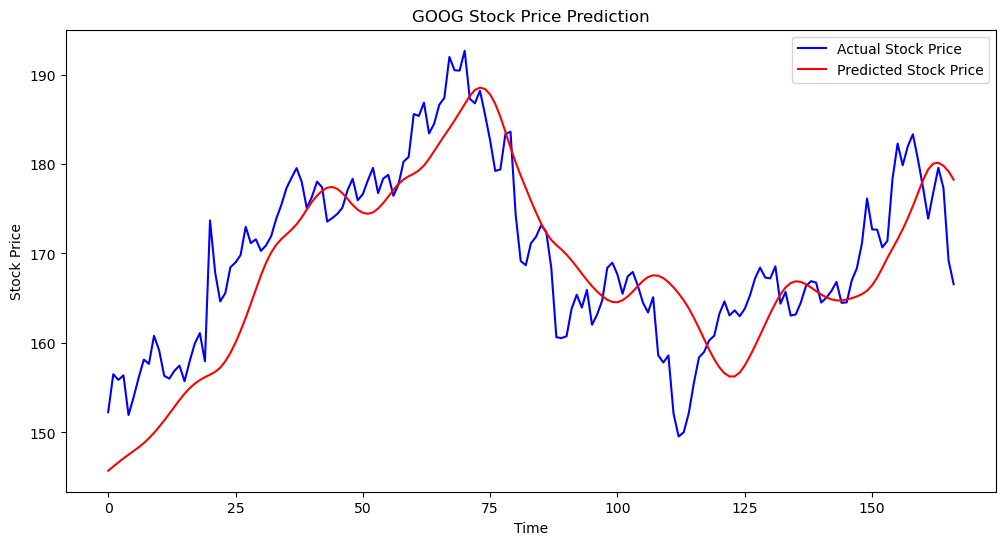

In [100]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from sklearn.preprocessing import MinMaxScaler

# Define the date range and stock ticker
start = '2024-01-01'
end = '2024-12-21'
stock = 'GOOG'

# Download the data
data = yf.download(stock, start=start, end=end)

# Select the 'Close' column for prediction
data = data[['Close']]

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Prepare the data as per the time steps used in model training
def create_dataset(data, time_step=60):
    X_data = []
    y_data = []
    for i in range(time_step, len(data)):
        X_data.append(data[i-time_step:i, 0])  # Use only the 'Close' column for X
        y_data.append(data[i, 0])  # Next 'Close' price as target for y
    return np.array(X_data), np.array(y_data)

# Set the time_step to the same value as used during training
time_step = 60  # Adjust based on your model's training step

# Create input and actual values
X_input, y_actual = create_dataset(scaled_data, time_step)
X_input = np.reshape(X_input, (X_input.shape[0], X_input.shape[1], 1))  # Reshape to 3D for LSTM input

# Load the saved model
model = load_model('Stock Predictions Model.keras')

# Make predictions
predictions = model.predict(X_input)

# Inverse scale both predictions and actual values
predicted_prices = scaler.inverse_transform(predictions)
actual_prices = scaler.inverse_transform(y_actual.reshape(-1, 1))

# Plot the actual vs predicted prices
plt.figure(figsize=(12, 6))
plt.plot(actual_prices, color='blue', label='Actual Stock Price')
plt.plot(predicted_prices, color='red', label='Predicted Stock Price')
plt.title(f'{stock} Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [102]:
pickle.dump(model,open("model1.pkl","wb")

NameError: name 'pickle' is not defined